In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import collections
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import os
from config.config import cfg
from utils.plot import sample_plot
from utils.image_utils import img_processing_cv2
from utils.region_proposal import region_of_interest

In [2]:
# Variable
IMG_SIZE = cfg['image']['image_size']
BATCH_SIZE = cfg['image']['batch_size']
SEED = cfg['image']['seed']
RAW_DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw')

In [3]:
dataset = image_dataset_from_directory(
    RAW_DATA_DIR,
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    labels='inferred',
    label_mode='int'
)

Found 41050 files belonging to 8 classes.


##### Visualizing a sample of the dataset

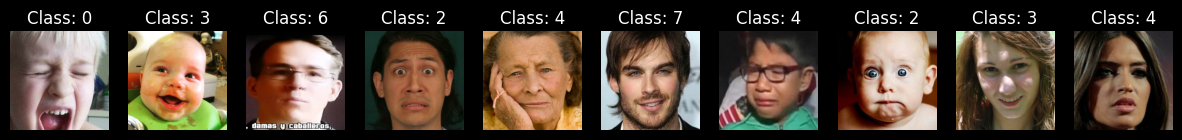

In [4]:
sample_plot(dataset, 10)

##### Visualizing classes distribution

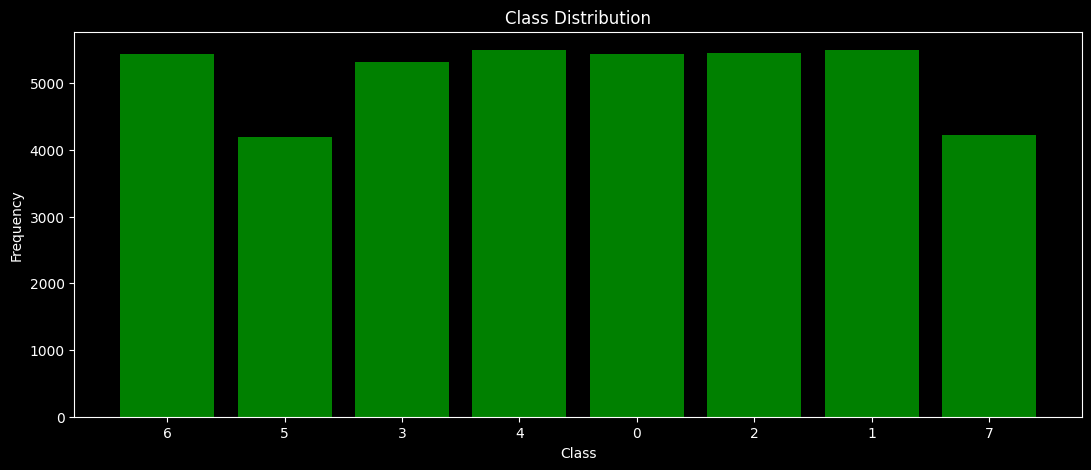

In [5]:
counts = collections.Counter()

for _, labels in dataset.unbatch():
    counts[int(labels.numpy())] += 1

plt.figure(figsize=(13, 5))
plt.bar(counts.keys(), counts.values(), color='green', align='center')
plt.xticks(list(counts.keys()), dataset.class_names)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

# Data preprocessing

##### Cleaning the data

In [6]:
CLEANED_DATA = img_processing_cv2(RAW_DATA_DIR, IMG_SIZE)

Image Processing Started...
Deleting old directory... C:\Users\Tony\PycharmProjects\faficial_expression_recognition\data\cleaned
Image Processing Completed


Found 41050 files belonging to 8 classes.


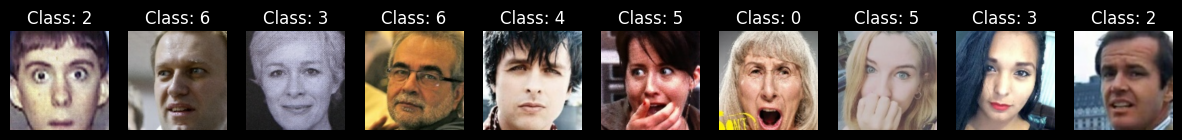

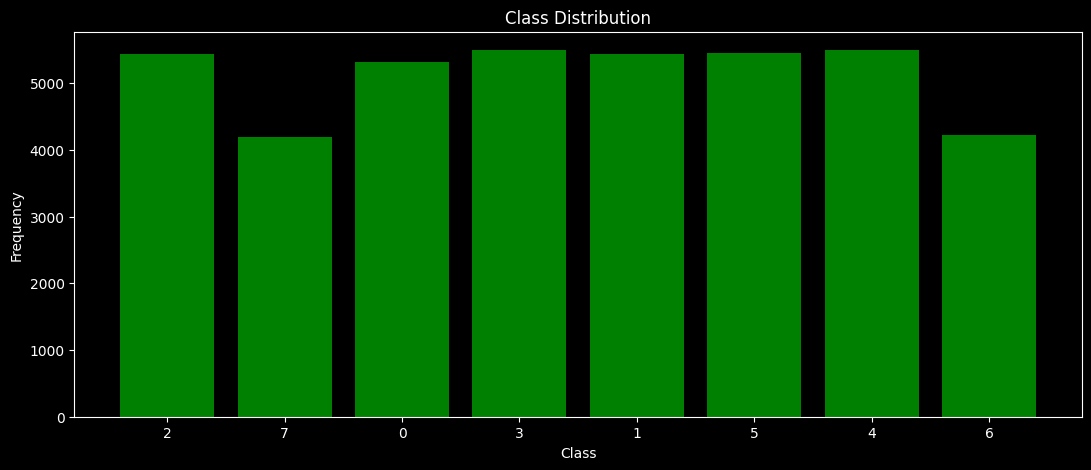

In [9]:
dataset = image_dataset_from_directory(
    CLEANED_DATA,
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    labels='inferred',
    label_mode='int'
)

sample_plot(dataset, 10)

#   Replotting Distribution
new_counts = collections.Counter()

for _, labels in dataset.unbatch():
    new_counts[int(labels.numpy())] += 1

plt.figure(figsize=(13, 5))
plt.bar(new_counts.keys(), new_counts.values(), color='green', align='center')
plt.xticks(list(new_counts.keys()), dataset.class_names)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

##### Region proposal by Selective search

In [10]:
REGION_PROPOSAL_PATH =  region_of_interest(CLEANED_DATA)

Starting region proposals for class: 0


KeyboardInterrupt: 

##### Data processing

In [ ]:
from utils.load_data import load_data

train_ds, val_ds, test_ds = load_data(REGION_PROPOSAL_PATH, BATCH_SIZE, IMG_SIZE, SEED)
sample_plot(train_ds, 10)
